In [1]:

%%cmd
pip install cmake


Microsoft Windows [Version 10.0.22621.1413]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Dell>pip install cmake

C:\Users\Dell>

In [2]:
%%cmd
python --version


Microsoft Windows [Version 10.0.22621.1413]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Dell>python --version
Python 3.8.16

C:\Users\Dell>

In [3]:
pip install ""C:\Users\Dell\Downloads\dlib-19.22.99-cp38-cp38-win_amd64.whl""

Processing c:\users\dell\downloads\dlib-19.22.99-cp38-cp38-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install face-recognition


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [43]:
import face_recognition as fr
import cv2
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

path directory of the trained data
lists all files and directories within the given path

In [44]:
path = "C:/Users/Dell/train1"
images = os.listdir(path)

In [45]:
known_names = []
known_name_encodings = []
images = os.listdir(path)

In [47]:
def read_img(path):
    img = cv2.imread(path) ## reading image
    (h,w) = img.shape[:2]  ## fetching height and width
    width = 500            ## hard coding width
    ratio = width / float(w) ## preparing a ration for height
    height = int(h * ratio)  ## generating new height
    return cv2.resize(img,(width,height))

#img_enc is initialized to the facial encoding of the first face found in img, which is extracted using fr.face_encodings().
#known_encodings is then appended with img_enc.
#file.split('.')[0] is used to remove the file extension (e.g. ".jpg") from the filename stored in file. This cleaned filename is then appended to known_names.

In [48]:
known_encodings = [] 
known_names = []
known_dir = 'C:/Users/Dell/train1' ##Known directory path
for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file) ##Reading all the images
    img_enc = fr.face_encodings(img)[0] ##face encodings
    known_encodings.append(img_enc) 
    known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['dhoni', 'rahul', 'rohit', 'virat']


In [49]:
known_image_dir = "C:/Users/Dell/train1"
known_image_filenames = os.listdir(known_image_dir)

In [50]:
known_image_filenames= os.listdir(known_image_dir)

# Extract the names of the people from the file names
names = [os.path.splitext(filename)[0] for filename in known_image_filenames]

# Remove any duplicate names from the list
names = list(set(names))

# Print the list of names
print(names)

['virat', 'dhoni', 'rahul', 'rohit']


In [51]:
unknown_image = "C:/Users/Dell/test1/test1.jpg"
image = cv2.imread(unknown_image)

face_locations is a list of tuples that represent the locations of the faces in the input image. Each tuple contains four integers that define the top, right, bottom, and left coordinates of a bounding box around a face.
fr.face_locations() is a function from the face_recognition module that takes an image as input and returns a list of face locations.
face_encodings is a list of 128-dimensional vectors that represent the facial features of each face in the input image.
fr.face_encodings() is a function from the face_recognition module that takes an image and a list of face locations as input and returns a list of facial encodings.

In [52]:
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

In [53]:
image = fr.load_image_file("C:/Users/Dell/test1/test6.jpg")
face_locations = fr.face_locations(image)

face_encodings is initialized as an empty list.
The code iterates over each face location in the face_locations list.
For each face location, the top, right, bottom, and left coordinates of the bounding box around the face are extracted.
A sub-image of the input image is extracted using these bounding box coordinates, using Numpy array slicing.
The facial encoding for the sub-image is extracted using fr.face_encodings().
If at least one facial encoding is found (i.e., the length of face_encoding is greater than 0), the first facial encoding in the list is appended to face_encodings.

In [54]:
face_encodings = []
for location in face_locations:
    top, right, bottom, left = location
    face_image = image[top:bottom, left:right]
    face_encoding = fr.face_encodings(face_image)
    if len(face_encoding) > 0:
        face_encodings.append(face_encoding[0])

creates a PIL image object from a NumPy array image. 
The Image.fromarray() function is a constructor for creating a PIL image from a NumPy array. 
The resulting pil_image object can then be used for further image manipulation or visualization using the functions provided by the PIL library.

In [55]:
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)

draw = ImageDraw.Draw(pil_image) creates a Draw object from the pil_image object, which can be used to draw on the image.
The code iterates over each face location in the face_locations list.
For each face location, the top, right, bottom, and left coordinates of the bounding box around the face are extracted.
A rectangle is drawn on the pil_image object using the Draw.rectangle() function, with the top-left and bottom-right coordinates of the rectangle specified as a tuple of tuples.
The outline parameter specifies the color of the rectangle as an RGB tuple. In this case, it is set to red (0, 0, 255).
fr.face_locations() and fr.face_encodings() are called again after the rectangle is drawn. It is unclear if this is intentional or if the code is supposed to have these lines outside the for loop.

In [56]:
draw = ImageDraw.Draw(pil_image)
for location in face_locations:
    top, right, bottom, left = location
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    face_locations = fr.face_locations(image)
    face_encodings = fr.face_encodings(image, face_locations)

In [57]:
pil_image.show()


In [24]:
def read_img(path):
    img = cv2.imread(path) ## reading image
    (h,w) = img.shape[:2]  ## fetching height and width
    width = 500            ## hard coding width
    ratio = width / float(w) ## preparing a ration for height
    height = int(h * ratio)  ## generating new height
    return cv2.resize(img,(width,height))

facial distance meaning that we calculate the similarity between the encoding of the test image and that of the train images. Now, we pick the minimum valued distance from it indicating that this face of the test image is one of the persons from the training dataset.

In [58]:

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_encodings, face_encoding)
    name = ""
    img_enc = fr.face_encodings(image)[0]##Encodings
    results = fr.compare_faces(known_encodings,img_enc)
    face_distances = fr.face_distance(known_encodings, img_enc)
    best_match = np.argmin(face_distances)
    if matches[best_match]:
        name = known_names[best_match]
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) 
    cv2.putText(image,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) 

In [59]:
cv2.imwrite("./output.jpg", image)

True

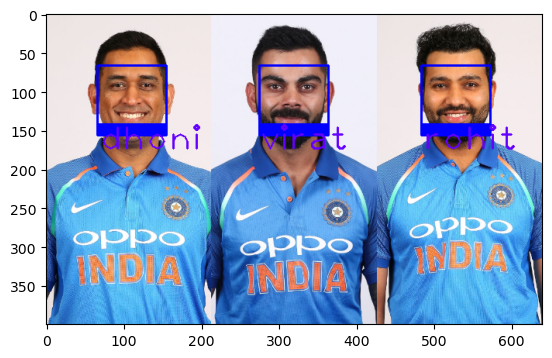

In [60]:
plt.imshow(image)

detecting the face using encoder of trained and  testing data set using similarity score

In [33]:
test_image_dir = "C:/Users/Dell/test1"
test_image_filenames = os.listdir(test_image_dir)

In [34]:
unknown_image = fr.load_image_file("C:/Users/Dell/test1/test3.jpg")

In [35]:
face_locations = fr.face_locations(unknown_image)

In [36]:
face_encodings = fr.face_encodings(unknown_image, face_locations)


In [39]:
for face_encoding in face_encodings:
    # Compare the face encoding with the known face encodings
    matches = fr.compare_faces(known_encodings, face_encoding)
    # Get the index of the matched face encoding
    match_index = [i for i, match in enumerate(matches) if match]
    # If there is a match, print the name of the person
    if match_index:
        name = known_names[match_index[0]]
        print("Detected face: {}".format(name))

Detected face: dhoni
